### Machine Learning Lab - 02
### 23 April , 2022
### 21BDA33
### Shivanshi Maheshwari

In [1]:
### Machine Learning - Trying to train a system, trying to create a mathematical model that could perform what a human can
### Supervised Learning Method - Regression, Classification
### So when the target variable is continous- we do regression, else classification
### Unsupervised Learning

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid")

In [3]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [5]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
tips=sns.load_dataset("tips")

In [6]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'taxis',
 'tips',
 'titanic']

In [7]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [8]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


##### total_bill - Total bill (cost of the meal), including tax, in US dollars || tip = Tip (gratuity) in US dollars || sex - Sex of person paying for the meal (0=male, 1=female) || smoker - Smoker in party? || day - Thursday, Friday, Saturday or Sunday || time - Day or Night || size - Size of the party

### Know the data

In [10]:
tips.sample(5)

,total_bill,tip,sex,smoker,day,time,size
189,23.10,4.00,Male,Yes,Sun,Dinner,3
134,18.26,3.25,Female,No,Thur,Lunch,2
93,16.32,4.30,Female,Yes,Fri,Dinner,2
106,20.49,4.06,Male,Yes,Sat,Dinner,2
156,48.17,5.00,Male,No,Sun,Dinner,6


In [12]:
tips.sample()

,total_bill,tip,sex,smoker,day,time,size
46,22.23,5.0,Male,No,Sun,Dinner,2


In [13]:
# sample returns data randomly. When an integer is not passed as a parameter, it returns a single row

In [14]:
tips['day'].value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

In [15]:
# returns how many times a particular day is appearing 

In [16]:
tips['time'].value_counts()

Dinner    176
Lunch      68
Name: time, dtype: int64

In [17]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [18]:
tips['size'].value_counts()

2    156
3     38
4     37
5      5
1      4
6      4
Name: size, dtype: int64

In [19]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [20]:
tips.isna().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [21]:
tips.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


In [22]:
# Positive correlation
# tip and total bill have moderately strong correlation
# size and total bill also have moderately strong correlation
# size and tip have moderately weak correlation 

## Data visualization

## https://seaborn.pydata.org/generated/seaborn.relplot.html

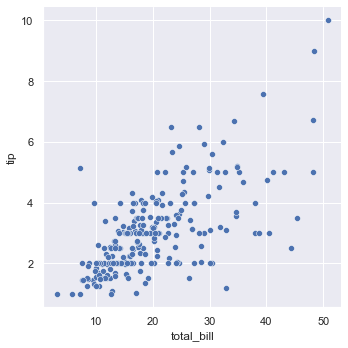

In [23]:
sns.relplot(x = "total_bill", y = "tip", data = tips)

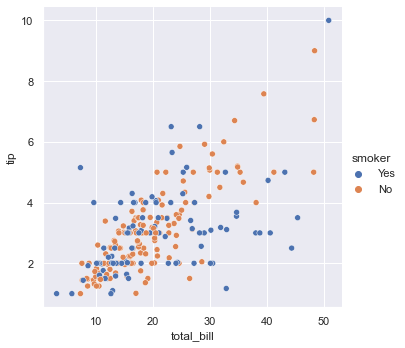

In [24]:
sns.relplot(x = "total_bill", y = "tip", hue= "smoker", data = tips)

## Scatterplots
## https://seaborn.pydata.org/generated/seaborn.scatterplot.html

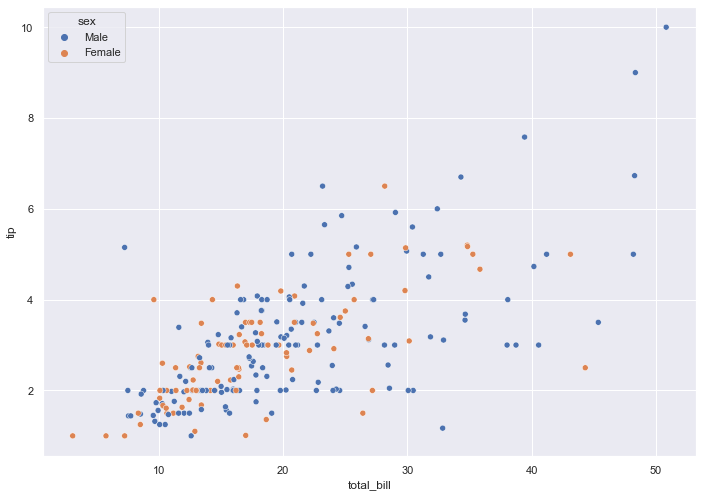

In [25]:
sns.scatterplot(x = "total_bill", y = "tip", hue= "sex", data = tips);

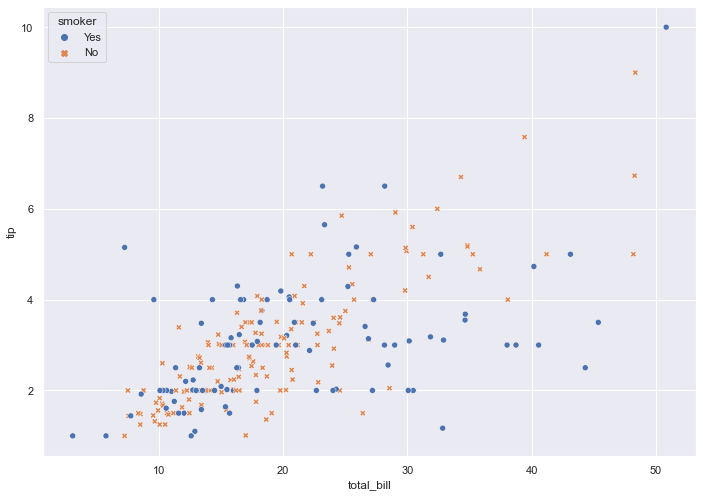

In [26]:
sns.scatterplot(x = "total_bill", y = "tip", hue= "smoker", style= "smoker", data = tips);

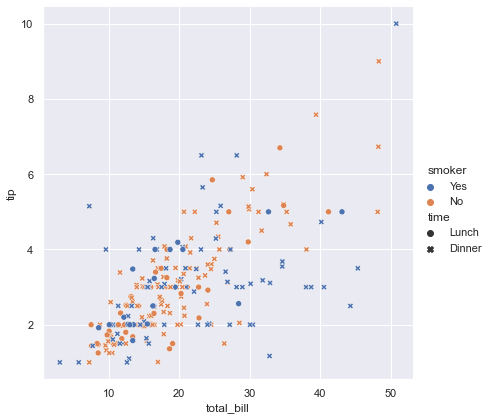

In [27]:
sns.relplot(x = "total_bill",
            y = "tip",
            hue = "smoker",
            style = "time",
            height = 6,
            data = tips);

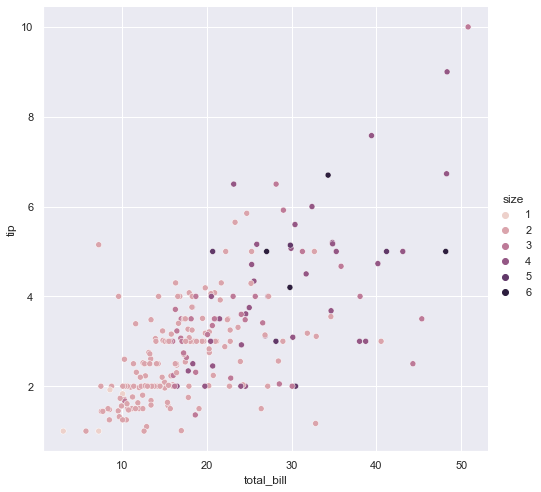

In [28]:
sns.relplot(x = "total_bill", y = "tip", hue = "size", height = 7, data = tips)

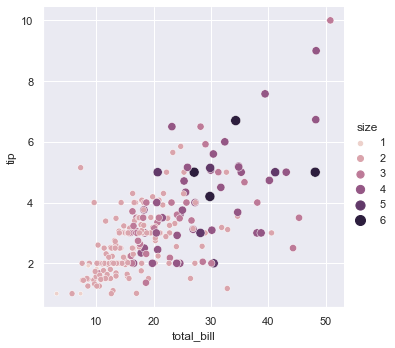

In [29]:
sns.relplot(x = "total_bill", y = "tip", size = "size", sizes = (20,100), hue = "size", data = tips);

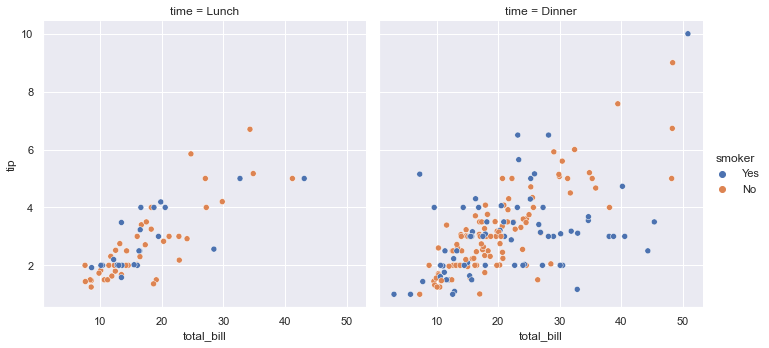

In [30]:
sns.relplot(x = "total_bill", y = "tip", hue = "smoker", col = "time", data = tips);

In [31]:
tips.groupby('time')['total_bill'].mean()

time
Lunch     17.168676
Dinner    20.797159
Name: total_bill, dtype: float64

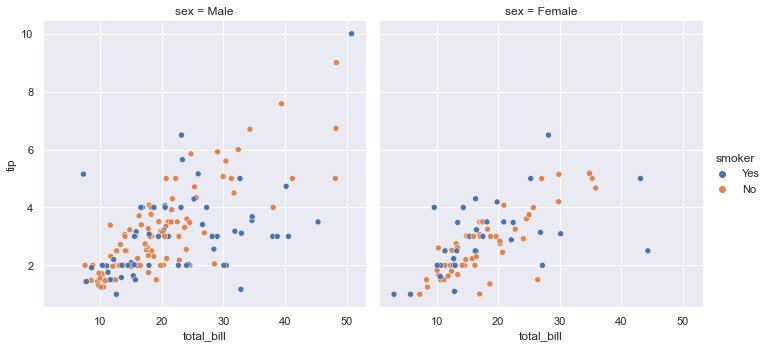

In [32]:
sns.relplot(x = "total_bill", y = "tip", hue = "smoker", col = "sex", data = tips)

In [33]:
tips.groupby('sex')['total_bill'].mean()

sex
Male      20.744076
Female    18.056897
Name: total_bill, dtype: float64

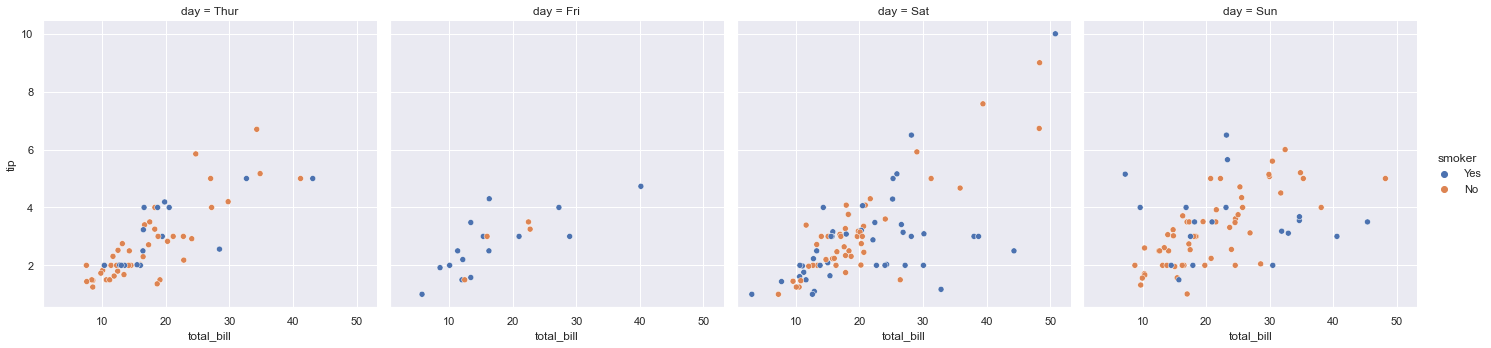

In [34]:
sns.relplot(x = "total_bill", y = "tip", hue = "smoker", col = "day", data = tips);

In [35]:
tips.groupby('day')['total_bill'].count()

day
Thur    62
Fri     19
Sat     87
Sun     76
Name: total_bill, dtype: int64

## Categorical plots
## https://seaborn.pydata.org/generated/seaborn.catplot.html

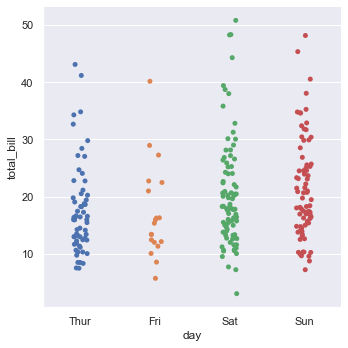

In [36]:
sns.catplot(x = "day", y = "total_bill", data = tips);

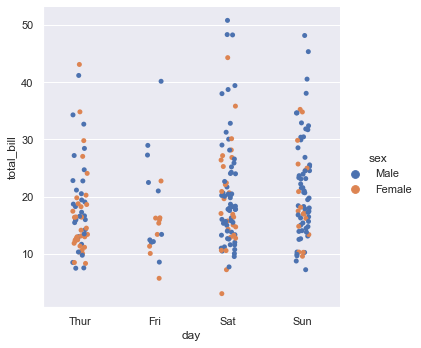

In [37]:
sns.catplot(x = "day", y = "total_bill", hue = "sex", data = tips);

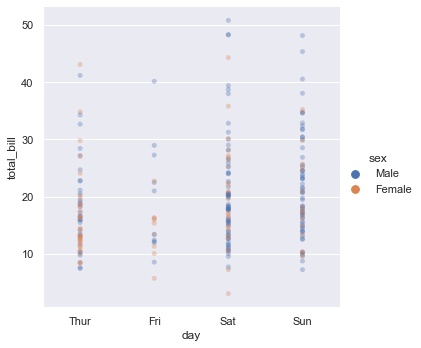

In [38]:
sns.catplot(x = "day", y = "total_bill", jitter = False, hue = "sex", alpha = .33, data = tips);

## Bee swarm plot
## https://seaborn.pydata.org/generated/seaborn.swarmplot.html

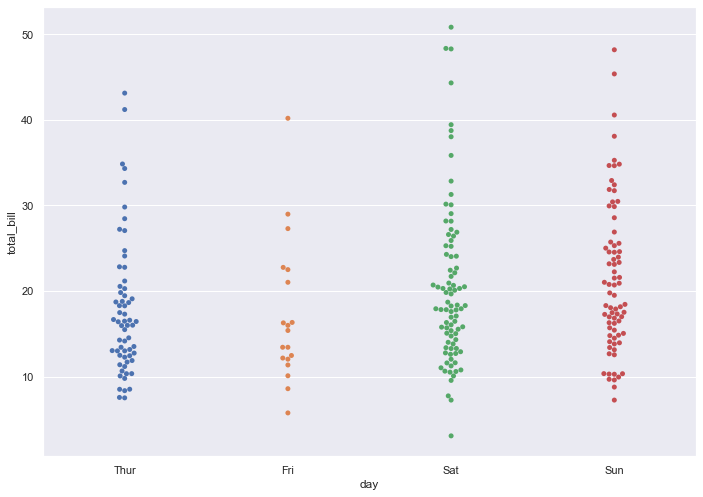

In [39]:
sns.swarmplot(x = "day", y = "total_bill", data = tips);

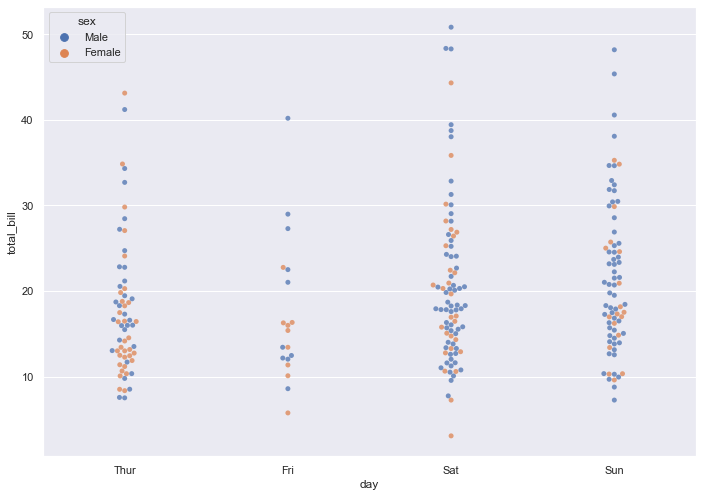

In [40]:
sns.swarmplot(x = "day", y = "total_bill", hue = "sex", alpha = .75, data = tips);

In [41]:
tips.groupby(['day', 'sex'])['total_bill'].count()

day   sex   
Thur  Male      30
      Female    32
Fri   Male      10
      Female     9
Sat   Male      59
      Female    28
Sun   Male      58
      Female    18
Name: total_bill, dtype: int64

<AxesSubplot:xlabel='size', ylabel='total_bill'>

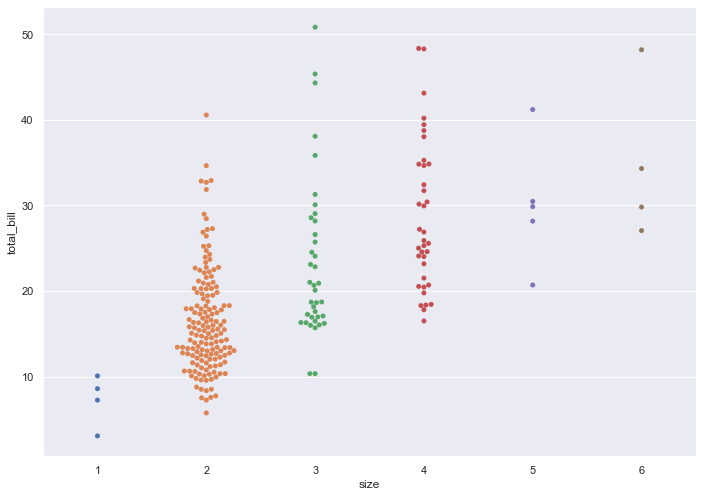

In [42]:
sns.swarmplot(x ="size", y = "total_bill", data = tips)

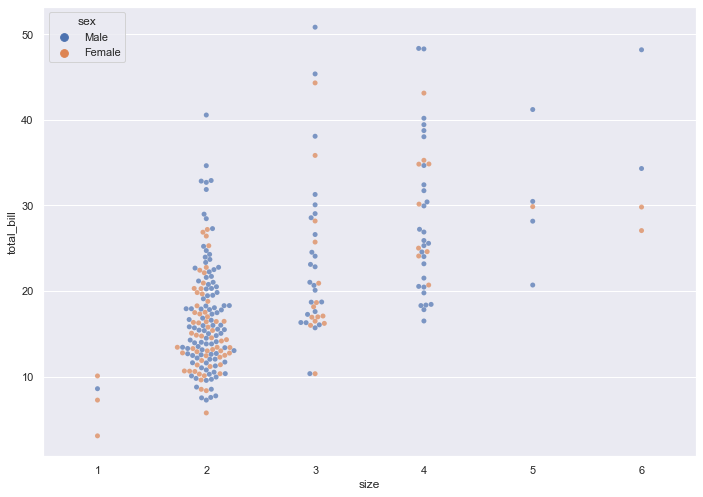

In [43]:
sns.swarmplot(x ="size", y = "total_bill", hue = "sex", alpha =.7, data = tips);

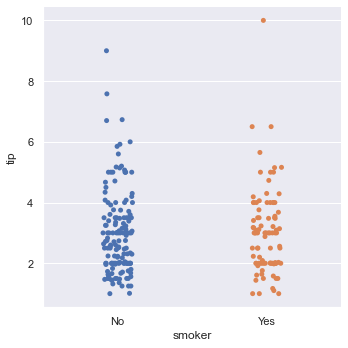

In [44]:
sns.catplot(x = "smoker", y = "tip", order = ["No", "Yes"], data = tips)

In [45]:
tips.groupby('smoker')['tip'].mean()

smoker
Yes    3.008710
No     2.991854
Name: tip, dtype: float64

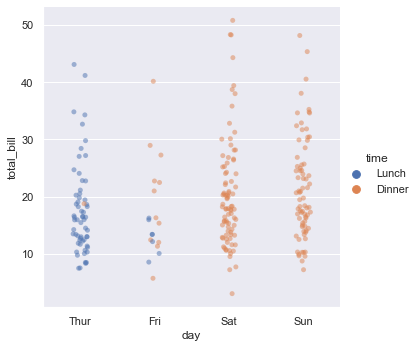

In [46]:
sns.catplot(x = "day", y = "total_bill", hue = "time", alpha = .5, data = tips)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

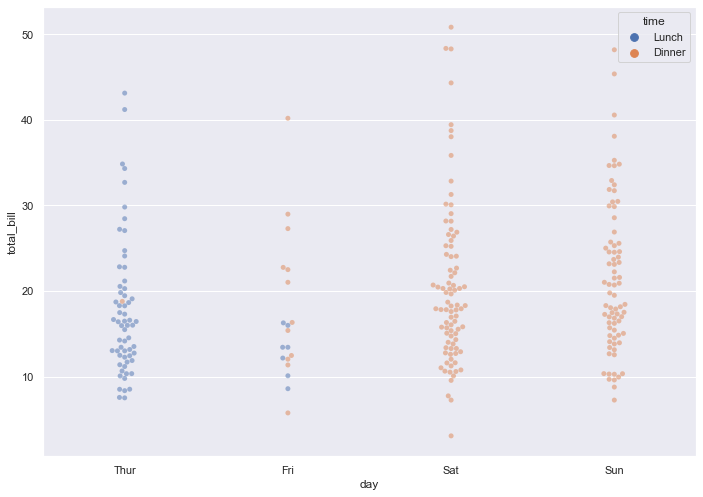

In [47]:
sns.swarmplot(x = "day", y = "total_bill", hue = "time", alpha = .5, data = tips)

## Boxplot
## https://seaborn.pydata.org/generated/seaborn.boxplot.html

<AxesSubplot:xlabel='day', ylabel='total_bill'>

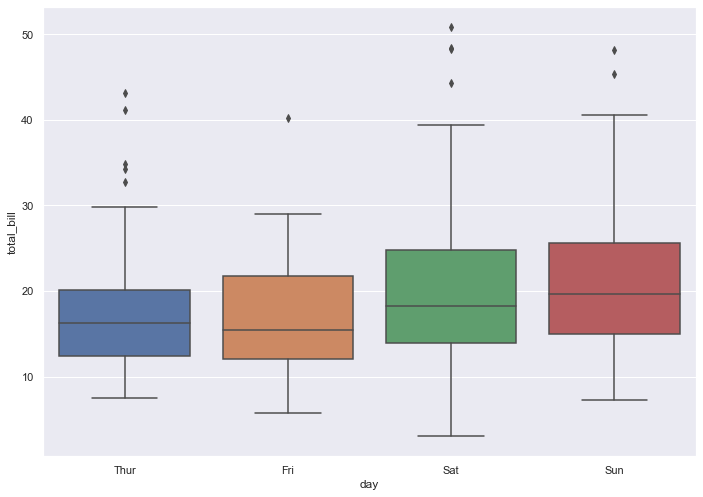

In [48]:
sns.boxplot(x = "day", y = "total_bill", data = tips)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

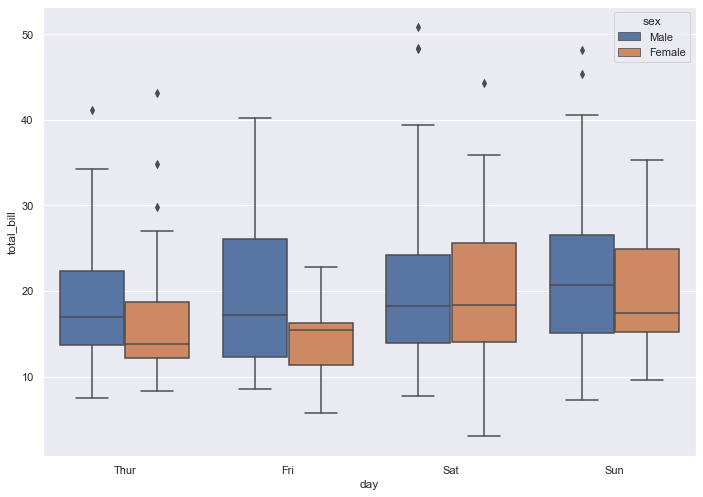

In [49]:
sns.boxplot(x = "day", y = "total_bill", hue = "sex", data = tips)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

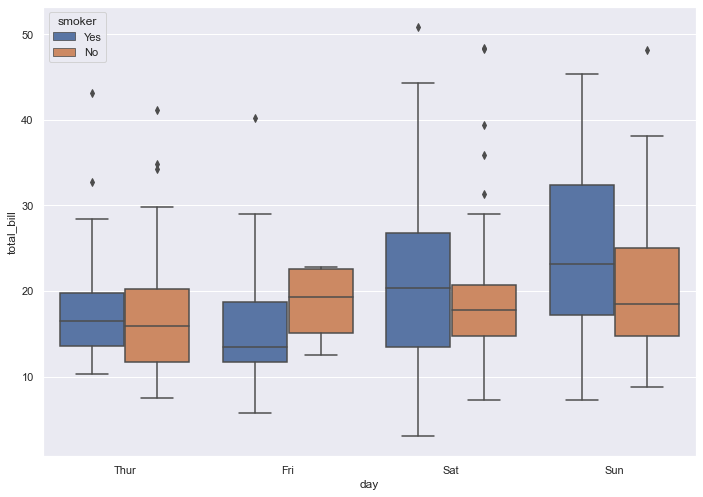

In [50]:
sns.boxplot(x = "day", y = "total_bill", hue = "smoker", data = tips)

In [51]:
tips["weekend"] = tips["day"].isin(["Sat","Sun"])

In [52]:
tips.sample(6)

,total_bill,tip,sex,smoker,day,time,size,weekend
78,22.76,3.00,Male,No,Thur,Lunch,2,False
91,22.49,3.50,Male,No,Fri,Dinner,2,False
24,19.82,3.18,Male,No,Sat,Dinner,2,True
100,11.35,2.50,Female,Yes,Fri,Dinner,2,False
58,11.24,1.76,Male,Yes,Sat,Dinner,2,True
219,30.14,3.09,Female,Yes,Sat,Dinner,4,True


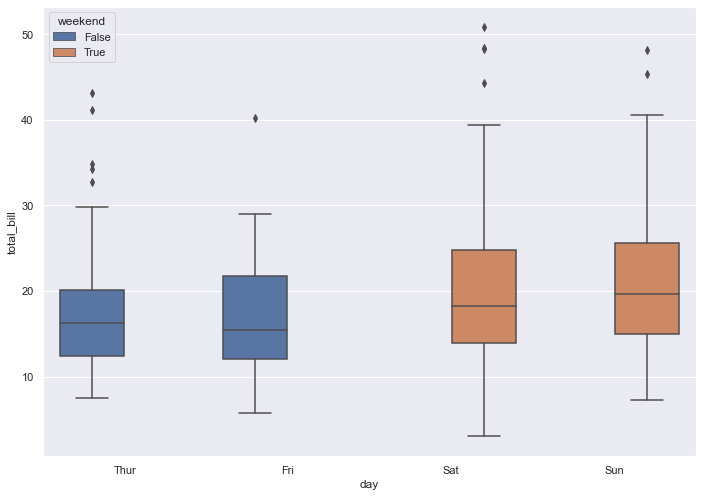

In [53]:
sns.boxplot(x = "day", y = "total_bill", hue = "weekend", data = tips);

## Boxen plot
## https://seaborn.pydata.org/generated/seaborn.boxenplot.html

<AxesSubplot:xlabel='sex', ylabel='tip'>

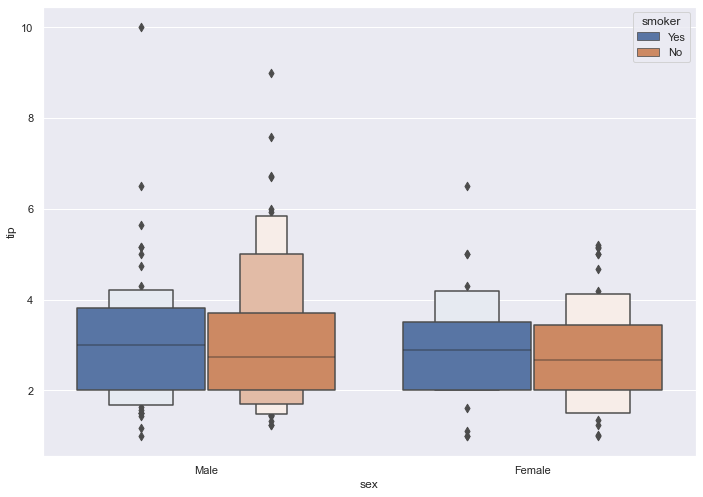

In [54]:
sns.boxenplot(x= "sex", y = "tip", hue = "smoker", data =tips)

## Fancy box plot
## https://seaborn.pydata.org/generated/seaborn.violinplot.html

<AxesSubplot:xlabel='day', ylabel='total_bill'>

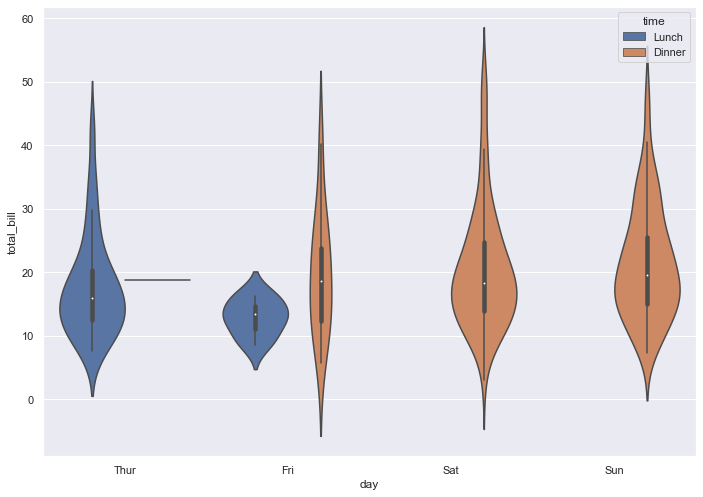

In [55]:
sns.violinplot(x ="day", y = "total_bill", hue = "time", data = tips)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

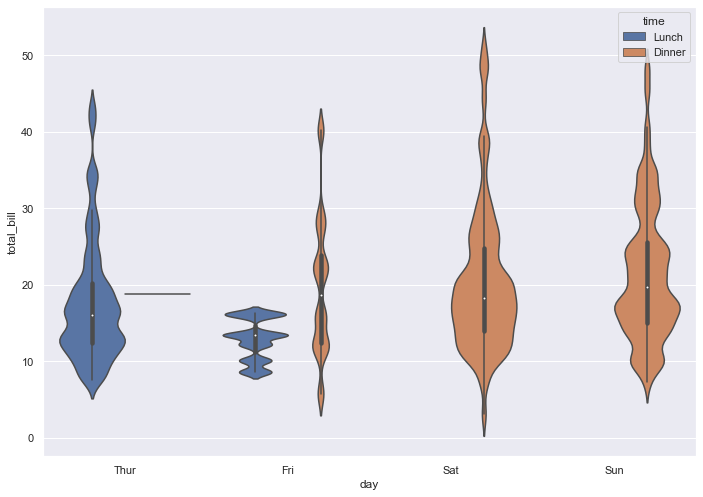

In [56]:
sns.violinplot(x ="day", y = "total_bill", hue = "time", bw = .15, data = tips)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

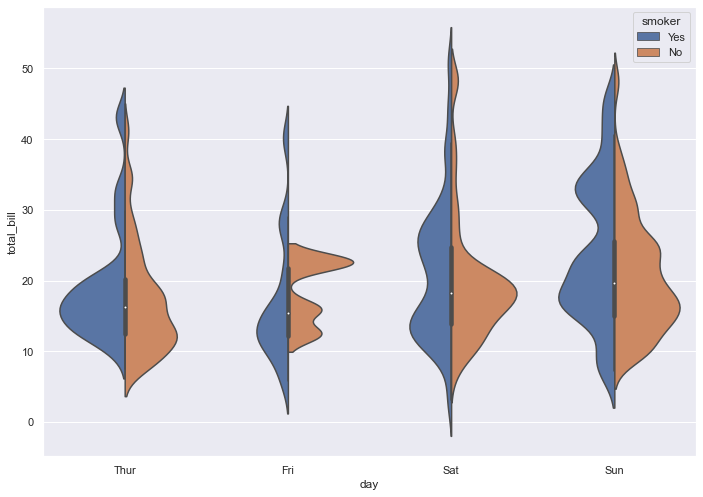

In [57]:
sns.violinplot(x ="day", y = "total_bill", hue = "smoker", bw = .25, split = True, data = tips)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

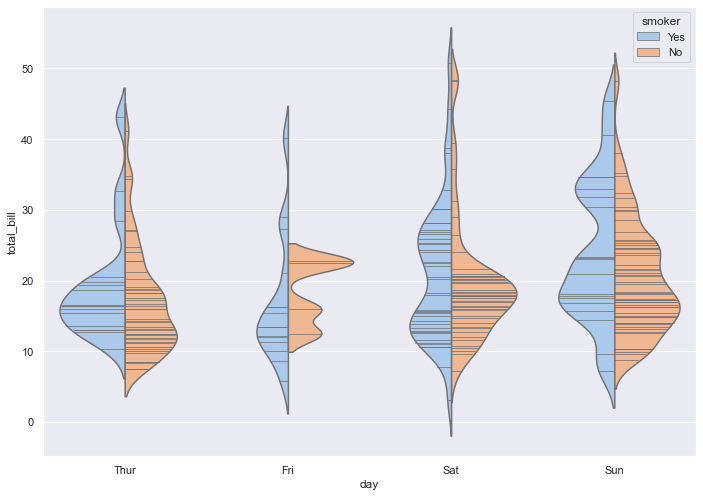

In [58]:
sns.violinplot(x="day", y="total_bill", hue="smoker", bw=.25, split=True, palette= "pastel", inner= "stick", data=tips)



<AxesSubplot:xlabel='day', ylabel='total_bill'>

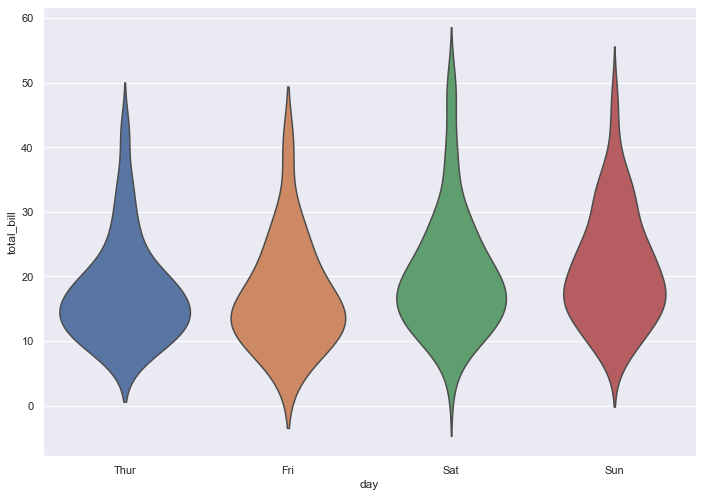

In [59]:
sns.violinplot(x = "day", y = "total_bill", inner = None, data = tips)

## Overlap two kinds of plots

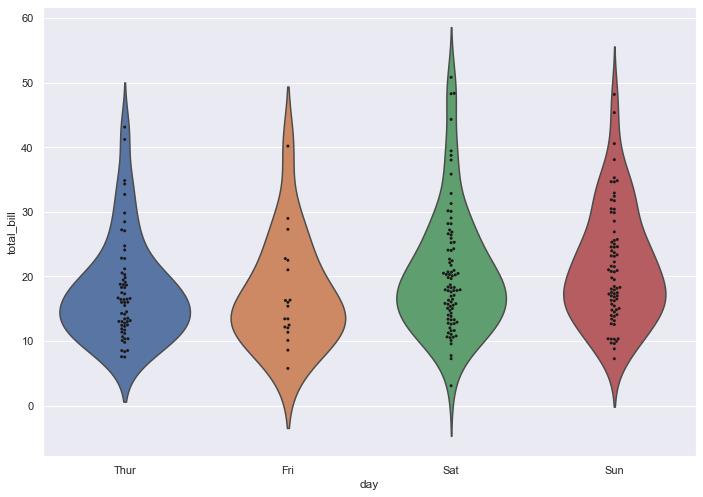

In [60]:
sns.violinplot(x = "day", y = "total_bill", inner = None, data = tips)
sns.swarmplot(x = "day", y = "total_bill", color = "k", size = 3, data = tips);

## Bar plot
## https://seaborn.pydata.org/generated/seaborn.barplot.html

<AxesSubplot:xlabel='sex', ylabel='total_bill'>

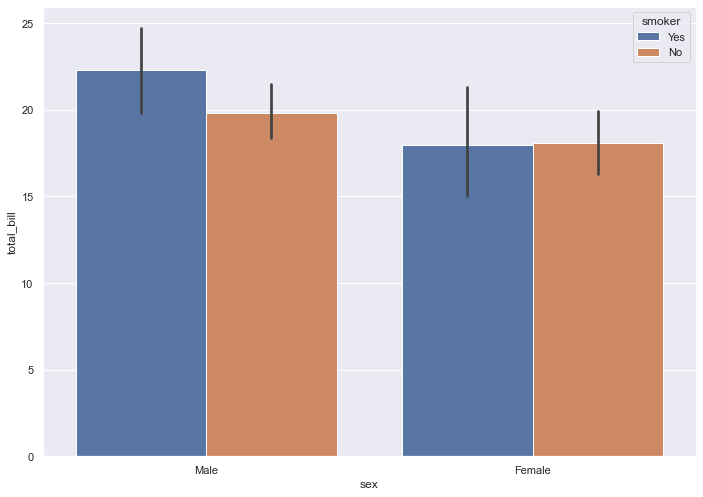

In [61]:
sns.barplot(x = "sex", y= "total_bill", hue = "smoker", data = tips)

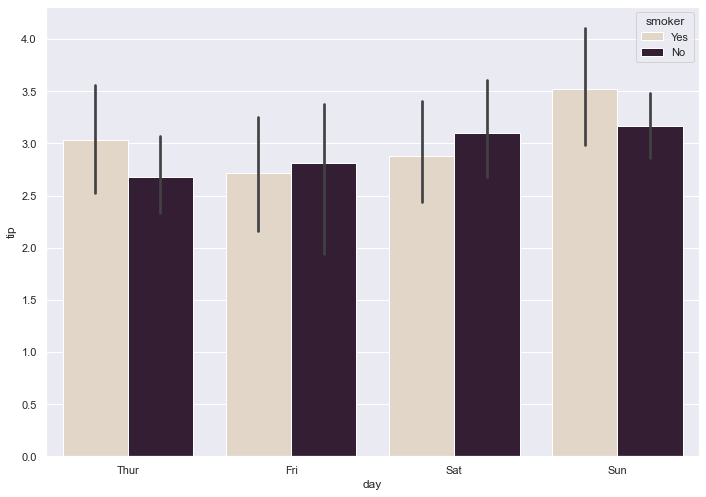

In [62]:
sns.barplot(x = "day", y= "tip", hue = "smoker", palette = "ch:.25", data = tips);

## Bars by categories
## https://seaborn.pydata.org/generated/seaborn.countplot.html

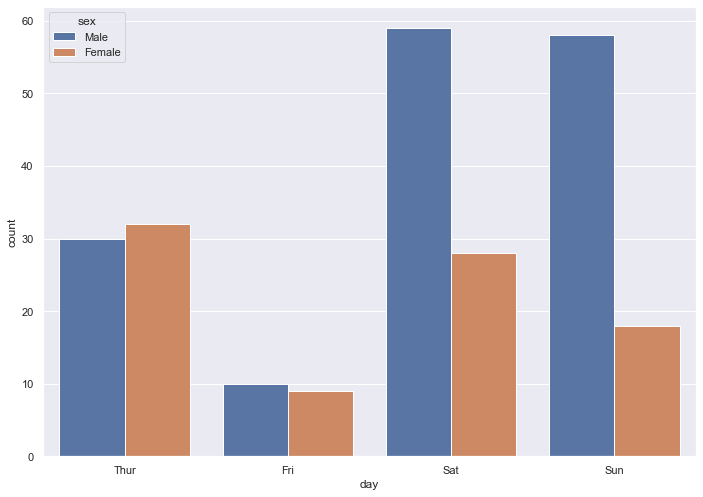

In [63]:
sns.countplot(x = "day", hue ="sex", data = tips);

<AxesSubplot:xlabel='sex', ylabel='count'>

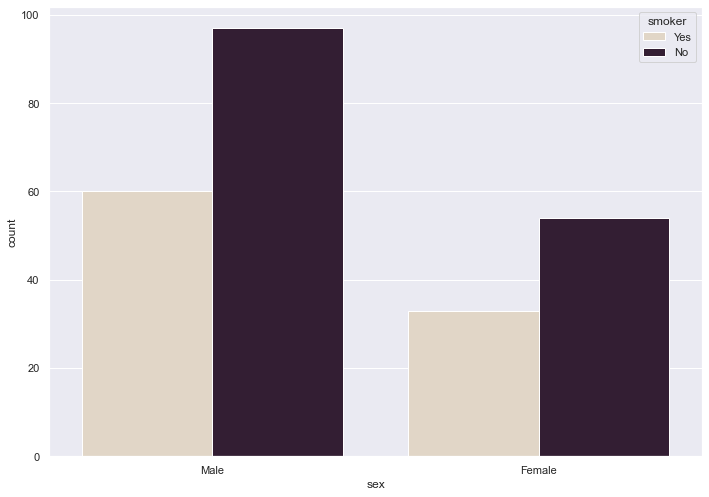

In [64]:
sns.countplot(x = "sex", hue = "smoker", palette = "ch:.25", data = tips)

<AxesSubplot:xlabel='day', ylabel='count'>

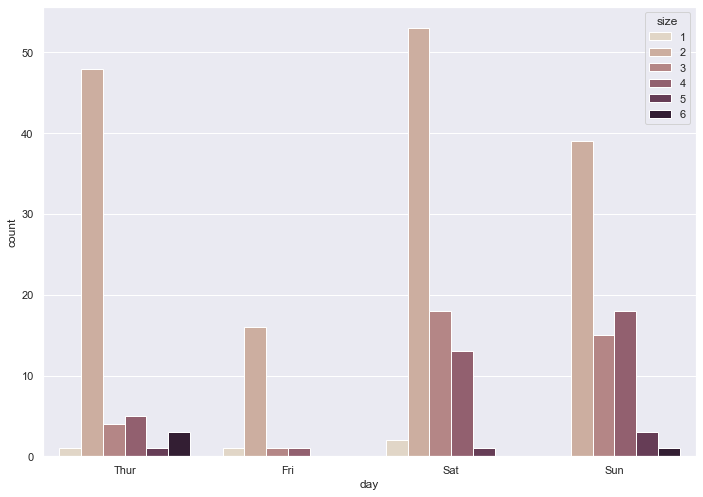

In [65]:
sns.countplot(x = "day", hue = "size", palette = "ch:.25", data = tips)

## Point plots
## https://seaborn.pydata.org/generated/seaborn.pointplot.html

<AxesSubplot:xlabel='day', ylabel='tip'>

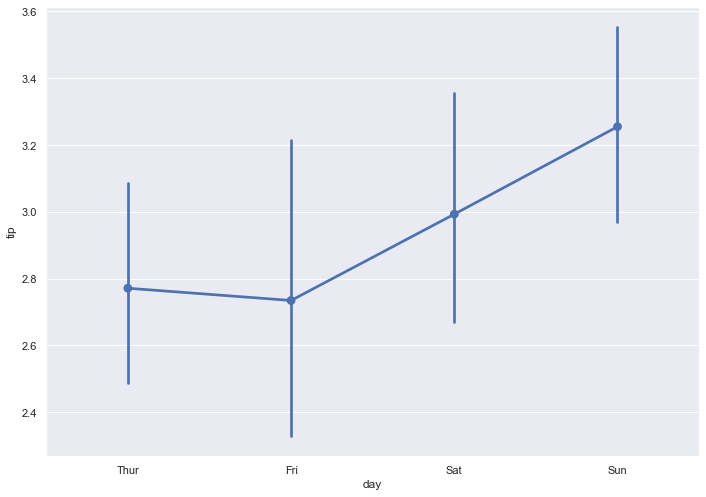

In [66]:
sns.pointplot(x = "day", y = "tip", data= tips)

<AxesSubplot:xlabel='day', ylabel='size'>

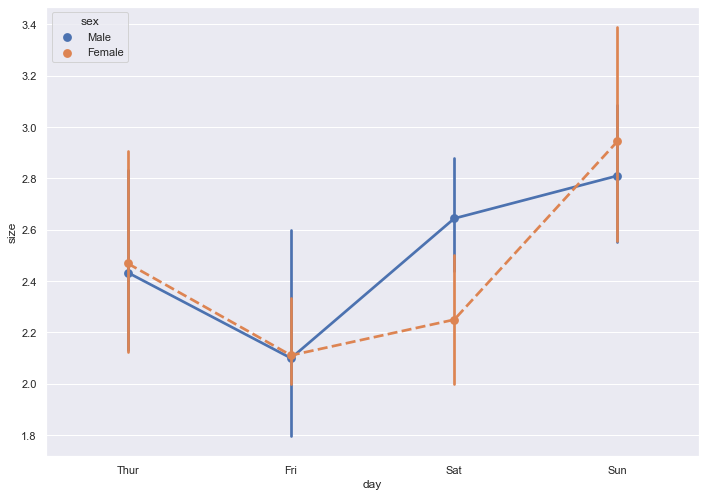

In [73]:
sns.pointplot(x = "day", y = "size", hue = "sex", linestyles = ["-", "--"], data= tips)

<AxesSubplot:xlabel='day', ylabel='count'>

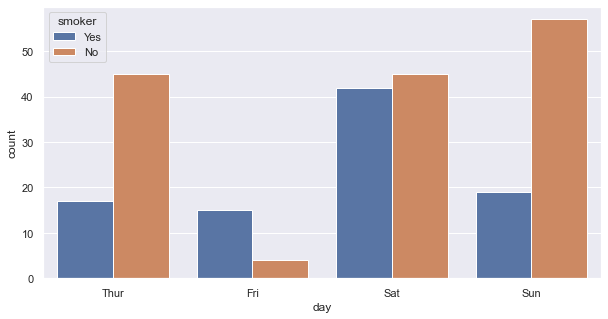

In [68]:
f, ax = plt.subplots(figsize = (10,5))
sns.countplot(x = "day", hue= "smoker", data = tips)

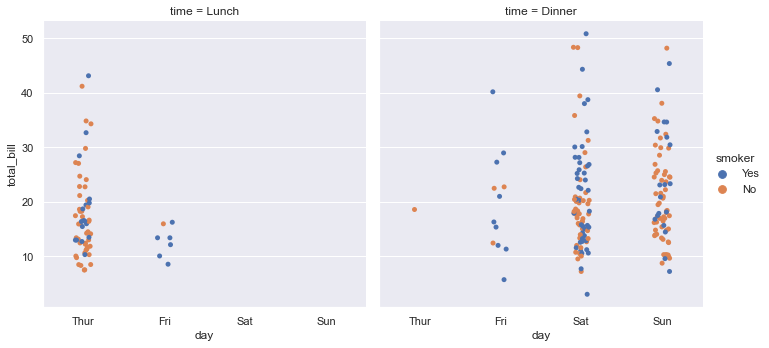

In [74]:
sns.catplot(x="day", y = "total_bill", hue = "smoker", col = "time", data = tips)

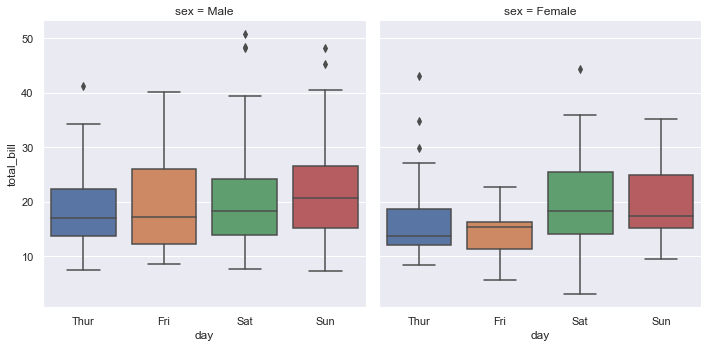

In [75]:
sns.catplot(x = "day", y = "total_bill", col = "sex", kind="box", data =tips)

## Reference
## https://www.kaggle.com/code/murats/visualization-with-seaborn-on-tips-dataset-part1/notebook
## https://seaborn.pydata.org/tutorial.html
## Bonus: Automated EDA

In [78]:

import sweetviz as sv
my_report = sv.analyze(tips)
my_report.show_html() # Default arguments will generate to "SWEETVIZ_REPORT.html"


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Feature: size                                |█▌| [ 78%]   00:00 -> (00:00 left)/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sweetviz/utils.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  clamped_series = clamped_series.append(other_series, ignore_index=False)
[Step 3/3] Generating associations graph     |      | [  0%]   00:00 -> (? left)/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sweetviz/graph_associations.py:223: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
 

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [77]:
pip install sweetviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 8.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 KB 3.2 MB/s eta 0:00:00
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.9/bin/python3.9 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


## 5 charts not done in class

## displot
## https://seaborn.pydata.org/tutorial/distributions.html#plotting-univariate-histograms

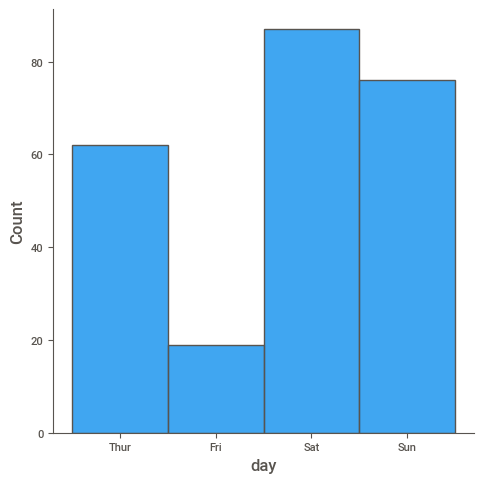

In [85]:
sns.displot(tips, x="day")

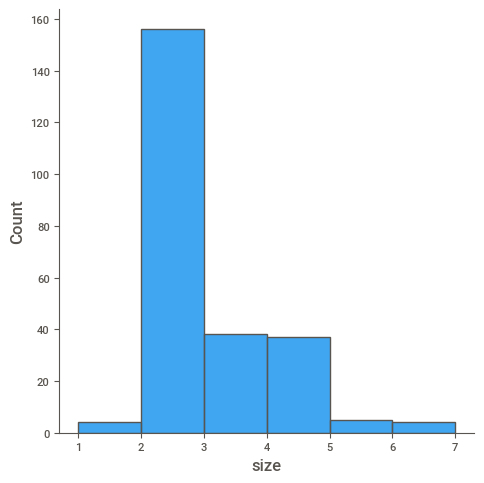

In [86]:
sns.displot(tips, x="size", bins=[1, 2, 3, 4, 5, 6, 7])

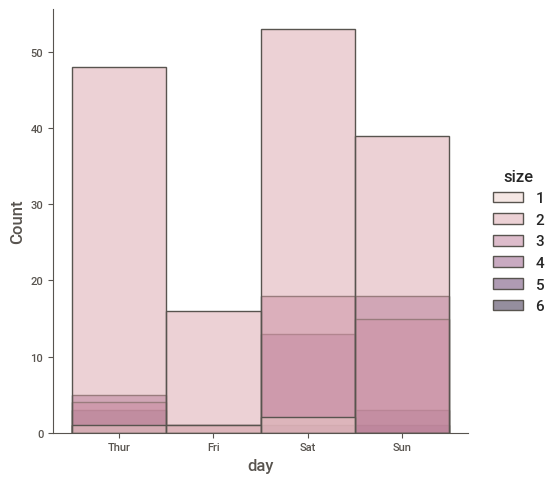

In [88]:
sns.displot(tips, x="day", hue="size")

## jointplot
## https://seaborn.pydata.org/examples/hexbin_marginals.html

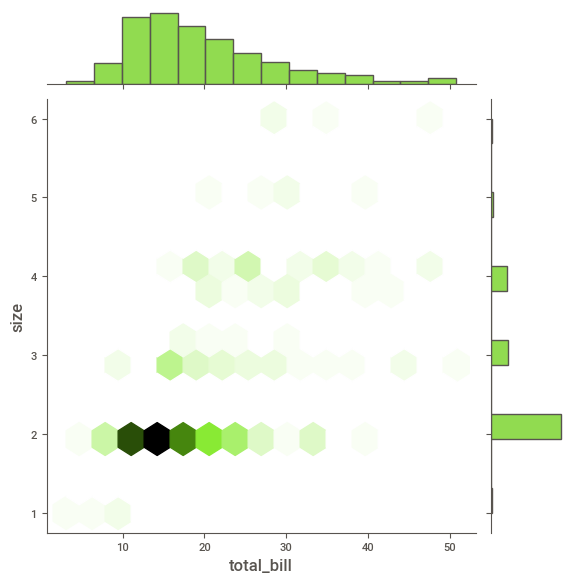

In [96]:
sns.jointplot(x=tips["total_bill"], y=tips["size"], kind="hex", color="#6CD015")

## histplot
## https://seaborn.pydata.org/examples/histogram_stacked.html

<AxesSubplot:xlabel='total_bill', ylabel='Count'>

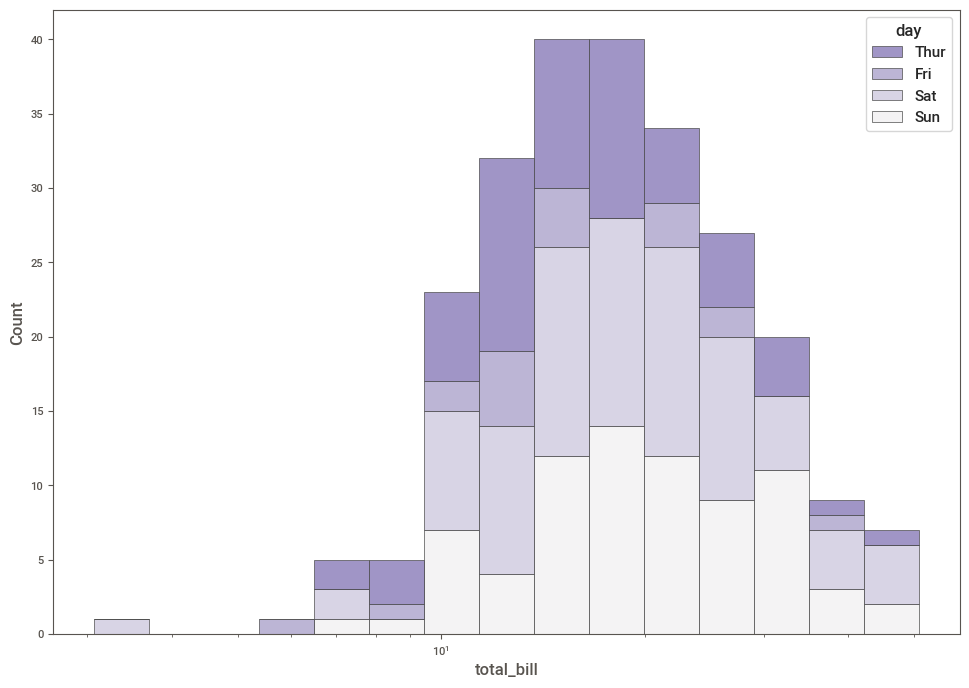

In [97]:
sns.histplot(
    tips,
    x="total_bill", hue="day",
    multiple="stack",
    palette="light:m_r",
    edgecolor=".3",
    linewidth=.5,
    log_scale=True,
)

## joint plot
## https://seaborn.pydata.org/examples/joint_kde.html

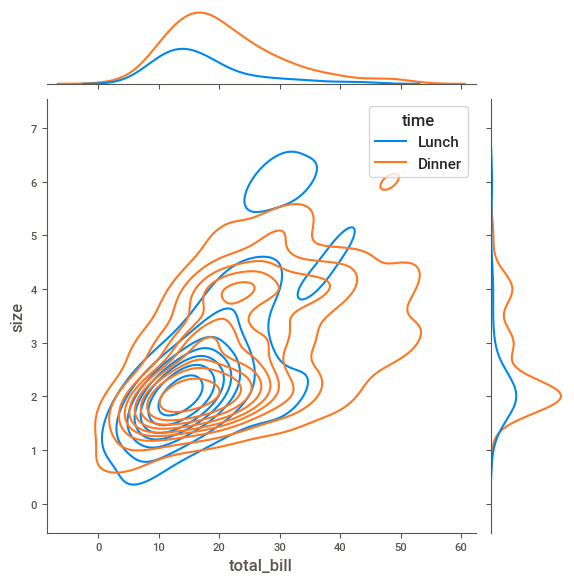

In [100]:
sns.jointplot(
    data=tips,
    x="total_bill", y="size", hue="time",
    kind="kde",
)

## residplot
## https://seaborn.pydata.org/examples/residplot.html

In [99]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
 7   weekend     244 non-null    bool    
dtypes: bool(1), category(4), float64(2), int64(1)
memory usage: 7.6 KB


<AxesSubplot:xlabel='total_bill', ylabel='tip'>

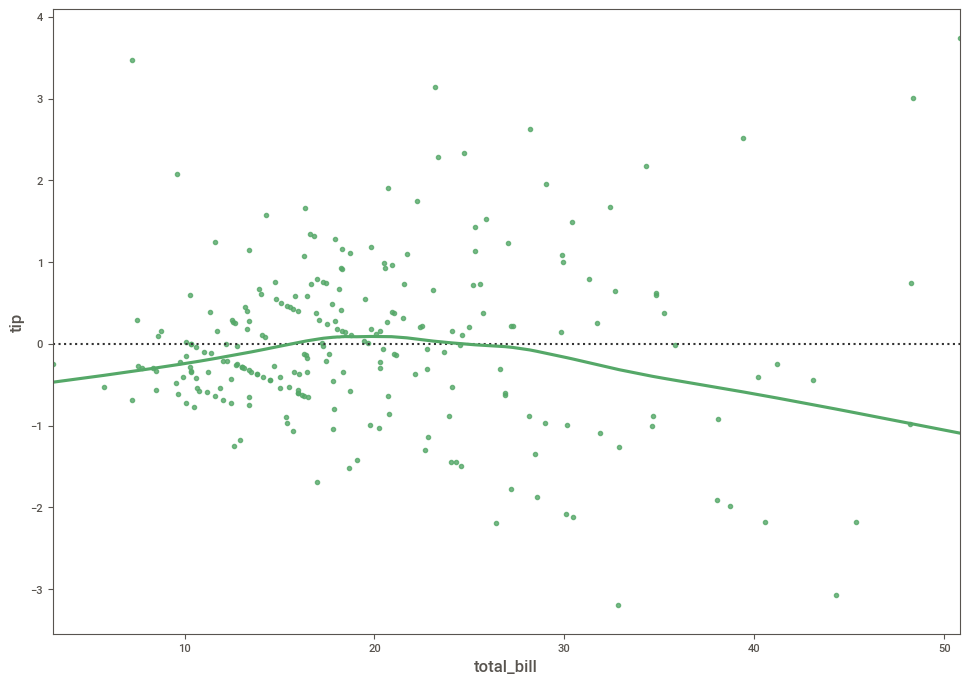

In [104]:

sns.residplot(x=tips["total_bill"], y=tips["tip"], lowess=True, color="g")

## REGRESSION

In [107]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
sns.set(style="darkgrid")

In [108]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

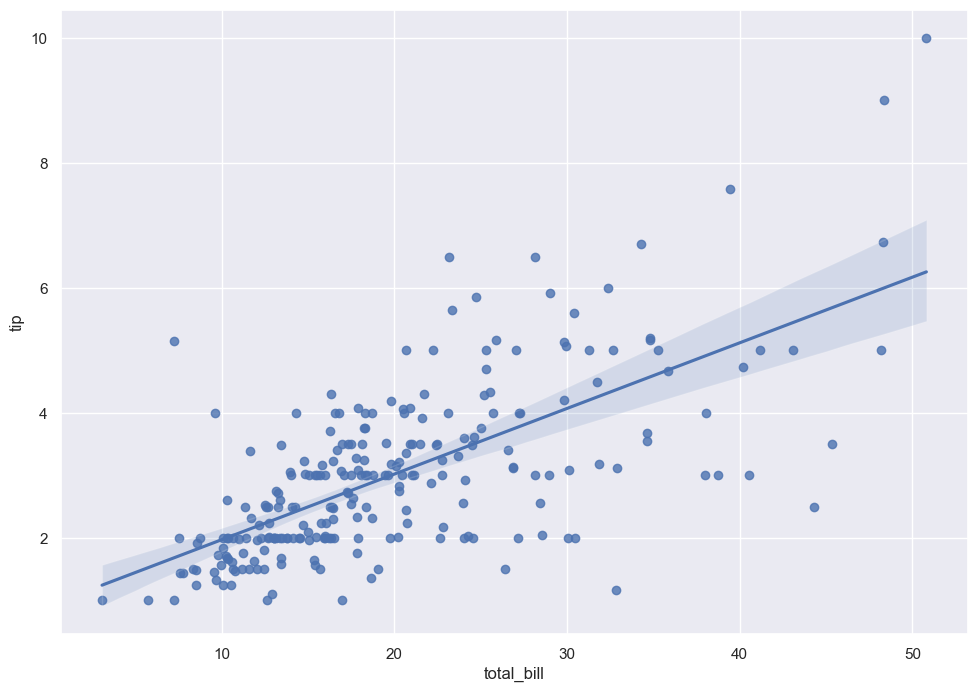

In [109]:
sns.regplot(x="total_bill", y="tip", data = tips)

### y=mX+c
### y=b0+b1X1
### Simple Linear Regression

In [110]:
tips

,total_bill,tip,sex,smoker,day,time,size,weekend
0,16.99,1.01,Female,No,Sun,Dinner,2,True
1,10.34,1.66,Male,No,Sun,Dinner,3,True
2,21.01,3.50,Male,No,Sun,Dinner,3,True
3,23.68,3.31,Male,No,Sun,Dinner,2,True
4,24.59,3.61,Female,No,Sun,Dinner,4,True
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,True
240,27.18,2.00,Female,Yes,Sat,Dinner,2,True
241,22.67,2.00,Male,Yes,Sat,Dinner,2,True
242,17.82,1.75,Male,No,Sat,Dinner,2,True


In [111]:
tips.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size', 'weekend'], dtype='object')

In [112]:
model_df = tips[['total_bill', 'tip']]

In [113]:
model_df

,total_bill,tip
0,16.99,1.01
1,10.34,1.66
2,21.01,3.50
3,23.68,3.31
4,24.59,3.61
...,...,...
239,29.03,5.92
240,27.18,2.00
241,22.67,2.00
242,17.82,1.75


In [114]:
x = model_df.total_bill

In [115]:
y = model_df.tip


In [116]:
model = LinearRegression()

In [118]:
model.fit(np.array(x).reshape(-1,1),y)

LinearRegression()

In [120]:
model.intercept_ #b0

0.920269613554674

In [121]:
model.coef_ #b1

array([0.10502452])

In [122]:
model.score(np.array(x).reshape(-1,1),y)

0.45661658635167657

### R - SQUARED VS ADJUSTED R - SQUARED
#### R-squared measures the proportion of the variation in your dependent variable (Y) explained by your independent variables (X) for a linear regression model. Adjusted R-squared adjusts the statistic based on the number of independent variables in the model.